# Computer Vision Contours

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

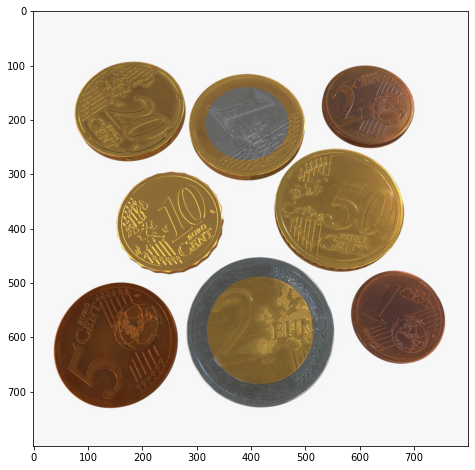

In [4]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

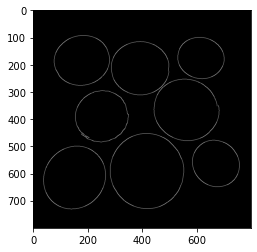

In [22]:
# Convert the image above to grayscale

gray_coins= cv2.cvtColor(color_coins, cv2.COLOR_BGR2GRAY)
# Apply some gaussian blur to it (try differente size kernels)

blur_coins = cv2.GaussianBlur(gray_coins,(9,9),0)


# Apply Canny to find edges and display the image 

edges_coins = cv2.Canny(blur_coins,100,200)
plt.imshow(edges_coins, cmap="gray")


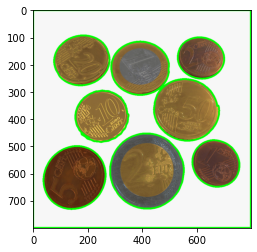

In [30]:
#using blur
contours_coins, h = cv2.findContours(blur_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_coins2= rgb_coins.copy()
cv2.drawContours(copy_coins, contours_coins, -1, (0, 255, 0), 5)
plt.imshow(copy_coins)

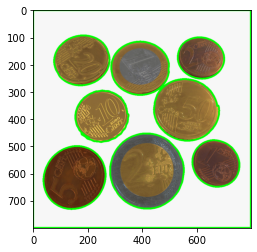

In [31]:
#just gray
contours_coins, h = cv2.findContours(gray_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_coins2= rgb_coins.copy()
cv2.drawContours(copy_coins, contours_coins, -1, (0, 255, 0), 5)
plt.imshow(copy_coins)

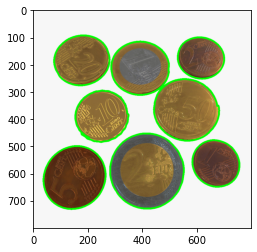

In [28]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?
contours_coins, h = cv2.findContours(edges_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
copy_coins= rgb_coins.copy()
cv2.drawContours(copy_coins, contours_coins, -1, (0, 255, 0), 5)
plt.imshow(copy_coins)


[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [29]:
# print the number of contours that has been found
len(contours_coins)

9

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

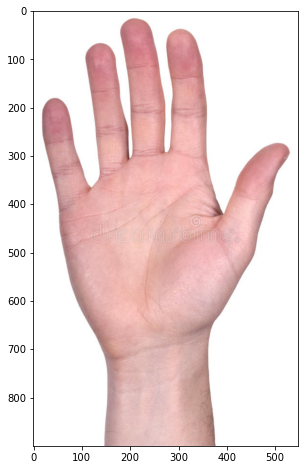

In [33]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise
color_hand = cv2.imread('image_hand.jpg', cv2.IMREAD_COLOR)
rgb_hand = cv2.cvtColor(color_hand,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_hand);

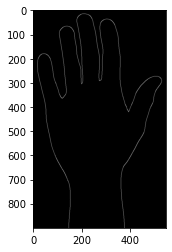

In [34]:
# Convert the image above to grayscale

gray_hand= cv2.cvtColor(color_hand, cv2.COLOR_BGR2GRAY)
# Apply some gaussian blur to it (try differente size kernels)

blur_hand = cv2.GaussianBlur(gray_hand,(9,9),0)


# Apply Canny to find edges and display the image 

edges_hand = cv2.Canny(blur_hand,100,200)
plt.imshow(edges_hand, cmap="gray")

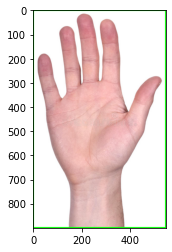

In [48]:
contours_hand, h = cv2.findContours(blur_hand, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
copy_hand= rgb_hand.copy()
cv2.drawContours(copy_hand, contours_hand, -1, (0, 255, 0), 5)
plt.imshow(copy_hand, cmap= "gray")

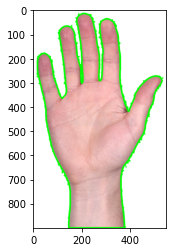

In [59]:
#threshold
blackg_hand= cv2.bitwise_not(gray_hand)
ret, th_hand= cv2.threshold(gray_hand, 248, 255, cv2.THRESH_BINARY_INV)

#contours
copy_hand2= rgb_hand.copy()
contours_hand, h = cv2.findContours(th_hand, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#imshow
cv2.drawContours(copy_hand2, contours_hand, -1, (0, 255, 0), 5)
plt.imshow(copy_hand2)
#plt.imshow(hand_th, cmap= "gray")


## Sorting Contours

### By area

In [63]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas
len(sorted_contour)

167

In [60]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var
contour_area= get_contour_areas(contours_hand)
sorted_contour= sorted(contours_hand, key= cv2.contourArea, reverse= True)


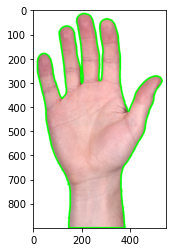

In [66]:
# Print the contour areas to screen
copy_hand5= rgb_hand.copy()

cv2.drawContours(copy_hand5, sorted_contour[:8], -1, (0, 255, 0), 5)
plt.imshow(copy_hand5)

In [ ]:
# Now sort the areas by biggest to smallest and print the sorted areas


[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [ ]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas


In [ ]:
# Filter out only the 5 biggest contours and print them


[Hint](# "Just slice the array!") 

In [ ]:
# Now in a clean image draw the contours you just filtered out and display it


In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [67]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))


In [70]:
def sort_contours(cnts, method="left-to-right"):
    # initialize the reverse flag and sort index
    reverse = False
    i = 0
    # handle if we need to sort in reverse
    
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
        
# handle if we are sorting against the y-coordinate rather than
# the x-coordinate of the bounding box

        if method == "top-to-bottom" or method == "bottom-to-top":
            i = 1
            
# construct the list of bounding boxes and sort them from top to# 
    bottomboundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),key=lambda b: b[1][i], reverse=reverse))
# return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)


[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
